# 1. Import Libraries and Dataset

## a. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## b. Read the Dataset

Data source: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [6]:
# Read the dataset:
df_train = pd.read_csv('house_train.csv')
df_test = pd.read_csv('house_test.csv')

In [8]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [10]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## c. Selecting Important columns on the Dataframe

In [13]:
print(df_train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [15]:
# Selecting the important columns from two DataFrames:
df_train = df_train[['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'RoofMatl', 'ExterQual', 'BedroomAbvGr', 'GrLivArea', 'MiscFeature', 'GarageArea', 'KitchenQual', 'SaleCondition', 'SalePrice']]
df_test = df_test[['LotArea', 'YearBuilt', 'OverallQual', 'OverallCond', 'RoofMatl', 'ExterQual', 'BedroomAbvGr', 'GrLivArea', 'MiscFeature', 'GarageArea', 'KitchenQual', 'SaleCondition']]

In [17]:
df_train

,LotArea,YearBuilt,OverallQual,OverallCond,RoofMatl,ExterQual,BedroomAbvGr,GrLivArea,MiscFeature,GarageArea,KitchenQual,SaleCondition,SalePrice
0,8450,2003,7,5,CompShg,Gd,3,1710,NaN,548,Gd,Normal,208500
1,9600,1976,6,8,CompShg,TA,3,1262,NaN,460,TA,Normal,181500
2,11250,2001,7,5,CompShg,Gd,3,1786,NaN,608,Gd,Normal,223500
3,9550,1915,7,5,CompShg,TA,3,1717,NaN,642,Gd,Abnorml,140000
4,14260,2000,8,5,CompShg,Gd,4,2198,NaN,836,Gd,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,1999,6,5,CompShg,TA,3,1647,NaN,460,TA,Normal,175000
1456,13175,1978,6,6,CompShg,TA,3,2073,NaN,500,TA,Normal,210000
1457,9042,1941,7,9,CompShg,Ex,4,2340,Shed,252,Gd,Normal,266500
1458,9717,1950,5,6,CompShg,TA,2,1078,NaN,240,Gd,Normal,142125


# 2. Exploratory Data Analysis (EDA) for Train Set

## a. Check Dataset Information

In [21]:
# Check data information:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LotArea        1460 non-null   int64 
 1   YearBuilt      1460 non-null   int64 
 2   OverallQual    1460 non-null   int64 
 3   OverallCond    1460 non-null   int64 
 4   RoofMatl       1460 non-null   object
 5   ExterQual      1460 non-null   object
 6   BedroomAbvGr   1460 non-null   int64 
 7   GrLivArea      1460 non-null   int64 
 8   MiscFeature    54 non-null     object
 9   GarageArea     1460 non-null   int64 
 10  KitchenQual    1460 non-null   object
 11  SaleCondition  1460 non-null   object
 12  SalePrice      1460 non-null   int64 
dtypes: int64(8), object(5)
memory usage: 148.4+ KB


- There is missing value on MiscFeature

In [24]:
# Check data statistical summary:
df_train.describe()

,LotArea,YearBuilt,OverallQual,OverallCond,BedroomAbvGr,GrLivArea,GarageArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,1971.267808,6.099315,5.575342,2.866438,1515.463699,472.980137,180921.195890
std,9981.264932,30.202904,1.382997,1.112799,0.815778,525.480383,213.804841,79442.502883
min,1300.000000,1872.000000,1.000000,1.000000,0.000000,334.000000,0.000000,34900.000000
25%,7553.500000,1954.000000,5.000000,5.000000,2.000000,1129.500000,334.500000,129975.000000
50%,9478.500000,1973.000000,6.000000,5.000000,3.000000,1464.000000,480.000000,163000.000000
75%,11601.500000,2000.000000,7.000000,6.000000,3.000000,1776.750000,576.000000,214000.000000
max,215245.000000,2010.000000,10.000000,9.000000,8.000000,5642.000000,1418.000000,755000.000000


## b. Histogram of Target Variable (Sale Price)

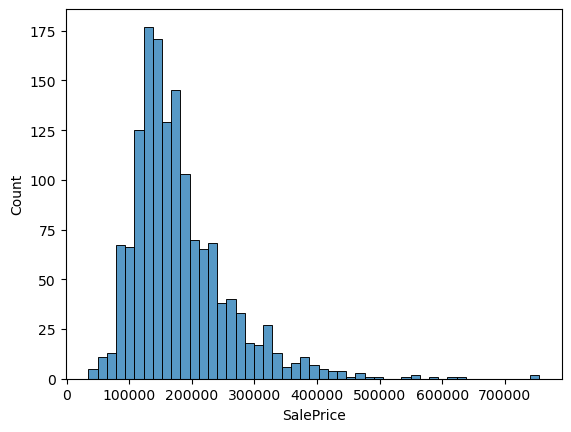

In [27]:
# Show distribution of "SalePrice" column:
sns.histplot(df_train['SalePrice'])
plt.show()

- The sale prices is not normally distributed.
- The data appears to be skewed (positively/negatively) and may contain outliers.
- This suggests that the sale prices are not evenly distributed around the mean, which could impact statistical analyses that assume normality. So,  preprocessing is needed before further analysis.

In [29]:
# Calculate skewness and kurtosis values:
# Skewness: a statistical measure used to assess how much the data distribution is skewed or asymmetric
# Kurtosis: a statistical measure used to assess how much the data distribution has long tails (outliers) and a sharp peak (peakedness) compared to a normal distribution (Gaussian distribution or bell-shaped distribution)

print (f"Skewness: {df_train['SalePrice'].skew()}")
print (f"Kurtosis: {df_train['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


- The skewness value of 1.88 suggests that the data is positively skewed (right-skewed). This means that most of the sale prices are clustered towards the lower end, with a few higher-priced outliers.
- In other words, there are more lower-priced properties, and fewer high-priced properties that stretch the distribution to the right.
- The kurtosis value of 6.54 is significantly greater than 3 (which represents a normal distribution's kurtosis). This indicates that the distribution has heavy tails and a sharper peak, which means there are outliers or extreme values present in your data. 

## c. Scatter Plot of GrLivArea vs Target Variable (Sale Price)

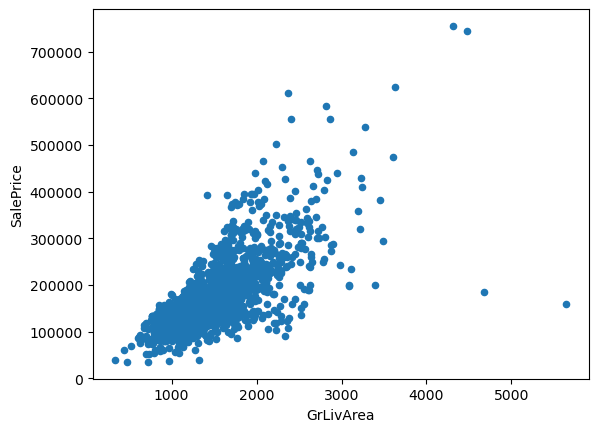

In [34]:
df_train.plot.scatter(x='GrLivArea', y='SalePrice')
plt.show()

- The larger the area, the price tends to be the higher .
- There is an anomaly where large areas have low prices.

In [37]:
# Check the data anomaly:

df_train[(df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 200000) |
         ((df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] > 700000))]

,LotArea,YearBuilt,OverallQual,OverallCond,RoofMatl,ExterQual,BedroomAbvGr,GrLivArea,MiscFeature,GarageArea,KitchenQual,SaleCondition,SalePrice
523,40094,2007,10,5,CompShg,Ex,3,4676,NaN,884,Ex,Partial,184750
691,21535,1994,10,6,WdShngl,Ex,4,4316,NaN,832,Ex,Normal,755000
1182,15623,1996,10,5,CompShg,Gd,4,4476,NaN,813,Ex,Abnorml,745000
1298,63887,2008,10,5,ClyTile,Ex,3,5642,NaN,1418,Ex,Partial,160000


- There are two houses with exceptionally high selling prices (over 700,000) and two with very low selling prices (under 200,000), all having a GrLivArea of more than 4,000.
- Interestingly, the houses sold at very low prices are actually larger (around 4,600 and 5,600 square feet). Upon closer inspection, the low-priced houses were sold under a partial sale condition, suggesting they were likely unfinished.
- In contrast, the high-priced house has a smaller area than the other two, possibly due to other factors such as house quality or location influencing the price.

## d. Boxplot of OverallQual vs Target Variable (Sale Price)

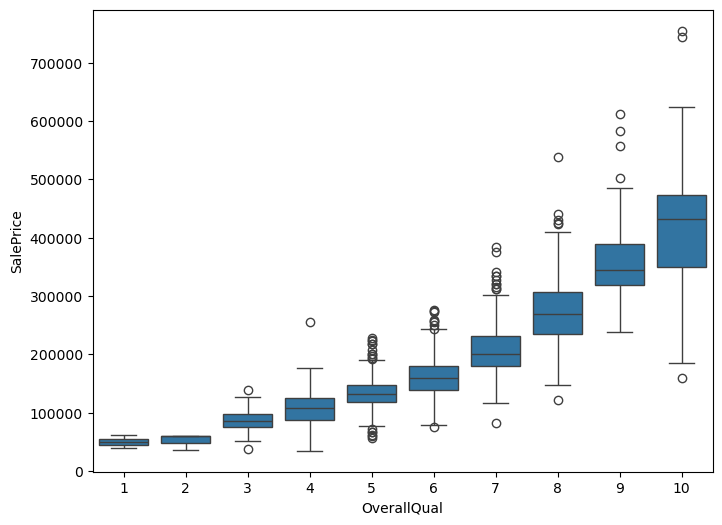

In [41]:
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
plt.show()

- As the OverallQual (represents the overall quality of the house) increases, the SalePrice also tends to increase.
- There are several outliers, particularly for high-quality houses (OverallQual of 9 and 10). For OverallQual = 10, there is an extreme outlier with a SalePrice exceeding 700,000 or under 200,000.

In [43]:
# Check the anomaly or outliers:

df_train[((df_train['OverallQual'] == 10) & (df_train['SalePrice'] < 200000)) | 
         ((df_train['OverallQual'] == 10) & (df_train['SalePrice'] > 700000))]

,LotArea,YearBuilt,OverallQual,OverallCond,RoofMatl,ExterQual,BedroomAbvGr,GrLivArea,MiscFeature,GarageArea,KitchenQual,SaleCondition,SalePrice
523,40094,2007,10,5,CompShg,Ex,3,4676,NaN,884,Ex,Partial,184750
691,21535,1994,10,6,WdShngl,Ex,4,4316,NaN,832,Ex,Normal,755000
1182,15623,1996,10,5,CompShg,Gd,4,4476,NaN,813,Ex,Abnorml,745000
1298,63887,2008,10,5,ClyTile,Ex,3,5642,NaN,1418,Ex,Partial,160000


- Houses with high OverallQual but low Sale Price (< 200,000) is houses with a partial sale condition, where the house is likely to be sold before completion and still under construction (unfinished work)
- Two other houses have high OverallQual and very high prices (>700,000): One of the houses was sold in normal conditions with an overall condition rating of 6 and features a high-quality luxury roof made of wood, which is aesthetic and eco-friendly, making it expensive. Meanwhile, the other house was sold under an abnormal sale condition, suggesting that it could be a luxury property or possess unique high-end features.

## e. Boxplot of YearBuilt vs Target Variable (Sale Price)

In [48]:
print(df_train['YearBuilt'].min(), df_train['YearBuilt'].max())

1872 2010


The oldest house was built in 1872, while the newest one was built in 2010.

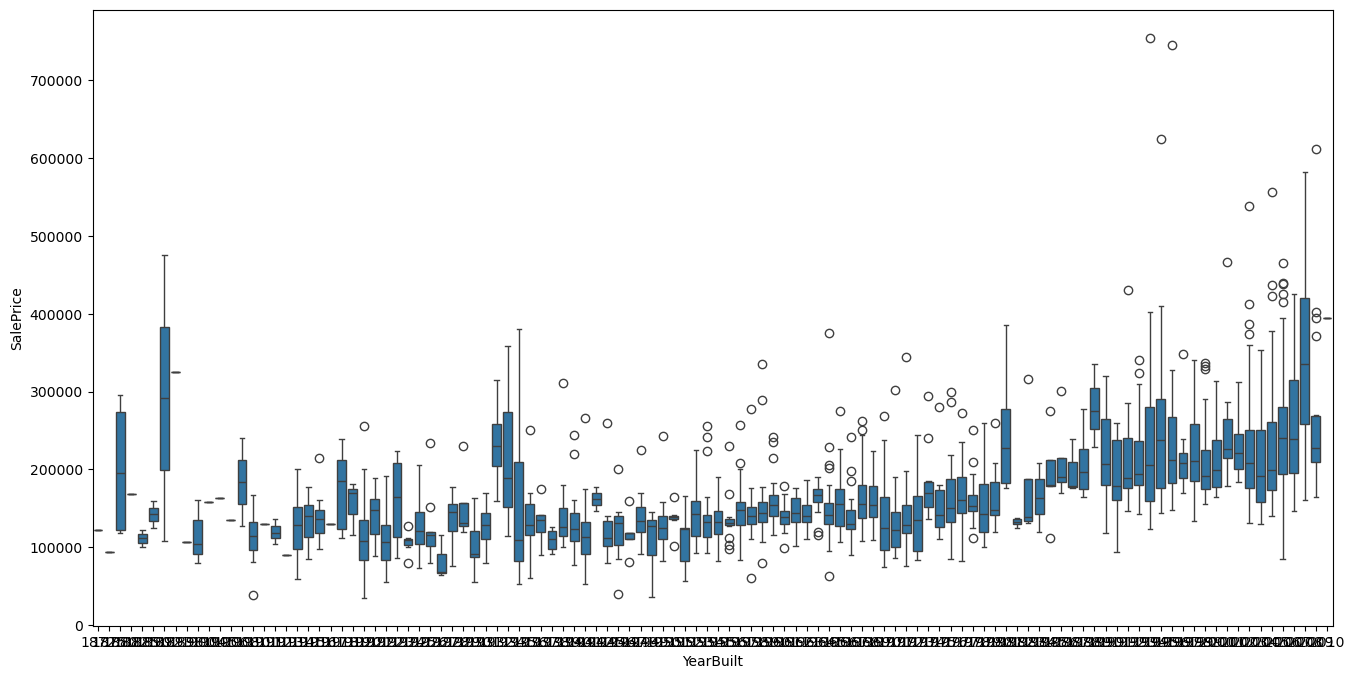

In [51]:
# Check whether there is a correlation between the year of manufacture and the sale price:

data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
plt.show()

There is no correlation between the year a house was built (Year Built) and Sale Price.

## f. Correlation among Variables

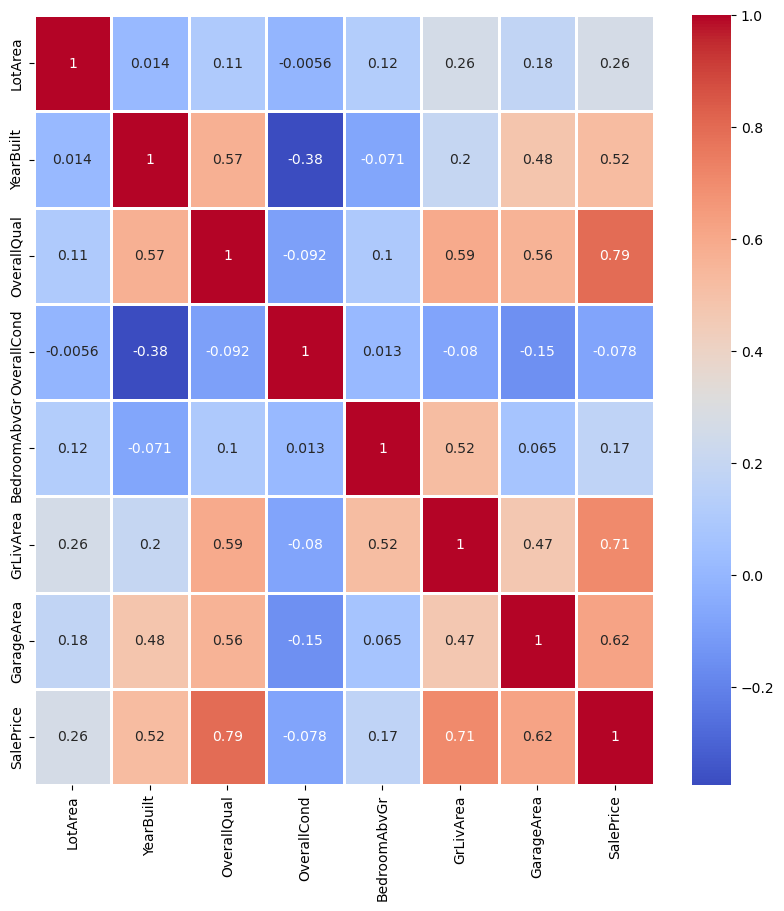

In [54]:
# Correlation map among variables:

plt.figure(figsize=(10,10))
ax = sns.heatmap(df_train.select_dtypes(exclude = 'object').corr(), cmap = 'coolwarm', annot=True, linewidth=2)
plt.show()

Insight: There is a positive correlation between Overall Quality (0.79) or GrLiving Area (0.71) and Sale Price.

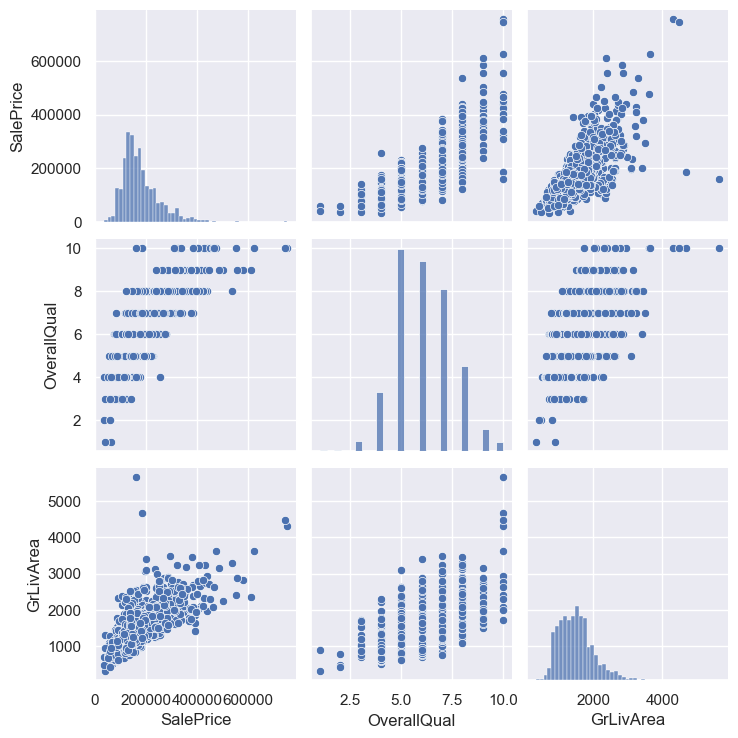

In [56]:
# Pairplot between three variables:

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

- Strong positive correlation between Sale Price and Overall Quality and GrLiving Area.
- Moderate correlation between Overall Quality and GrLiving Area: higher quality houses tend to be larger, but size is not the only factor.
- Sale Price and GrLiving Area are right-skewed distributions.

## g. Distribution of Target Variable (SalePrice column)

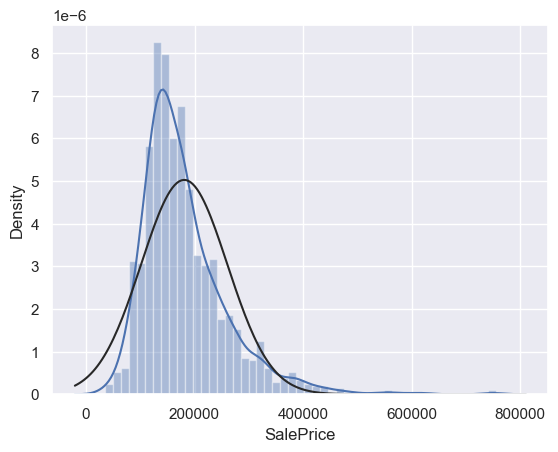

In [59]:
sns.distplot(df_train['SalePrice'], fit = norm)
plt.show()

***The sale prices is not normally distributed. So,  preprocessing (transformation) is needed before further analysis.***

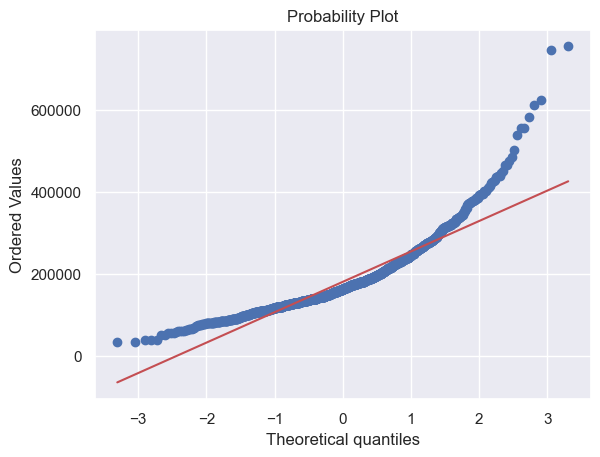

In [62]:
# Re-check the SalePrice using QQ-plot (Quantile-Quantile plot) whether the data follows a normal distribution:
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

***- The SalePrice is NOT normally distributed and is right-skewed with high-priced outliers.***

***- Log transformation can be applied to reduce this skewness.***

# 3. Data Preprocessing

## a. Log Transformation for Target Variable (Sale Price)

In [67]:
df_train_tf = df_train.copy()     #copy the original dataframe

In [68]:
# Before applying the transformation to the entire dataset, we first test it on two data points, one of which is an outlier:

# Before transformation:
print(755000 - 180000)  

print("")

# After transformation:
print(np.log1p(755000)) 
print(np.log1p(180000))  

print("")
print(np.log1p(755000) - np.log1p(180000))


575000

13.534474352733596
12.100717685412471

1.4337566673211253


- The difference between the two saleprices before the transformation is 575,000 (LARGE).
- The difference between the two saleprices after the transformation is 1.44 (SMALL).

In [70]:
# Apply Log Transformation to SalePrice column:
df_train_tf['SalePrice'] = np.log1p(df_train['SalePrice'])

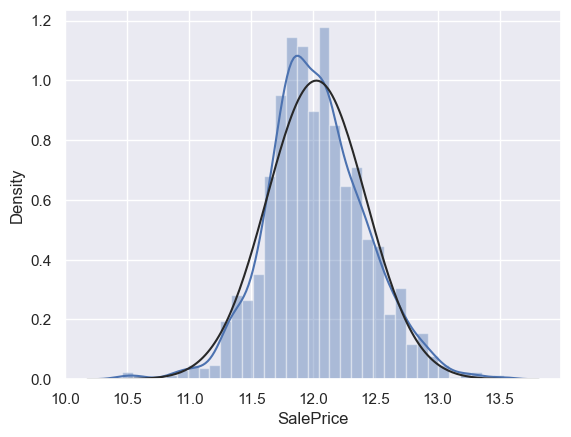

In [71]:
# Re-check the distribution:
sns.distplot(df_train_tf['SalePrice'], fit = norm)
plt.show()

**This confirms that the transformation effectively made SalePrice more normally distributed. Statistical models and machine learning algorithms typically perform better when the data follows a normal distribution.**

## b. Merge Train and Test Data

In [74]:
ntrain = df_train_tf.shape[0]
ntest = df_test.shape[0]
y_train = df_train_tf.SalePrice.values
all_data = pd.concat((df_train_tf, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 12)


In [75]:
all_data

,LotArea,YearBuilt,OverallQual,OverallCond,RoofMatl,ExterQual,BedroomAbvGr,GrLivArea,MiscFeature,GarageArea,KitchenQual,SaleCondition
0,8450,2003,7,5,CompShg,Gd,3,1710,NaN,548.0,Gd,Normal
1,9600,1976,6,8,CompShg,TA,3,1262,NaN,460.0,TA,Normal
2,11250,2001,7,5,CompShg,Gd,3,1786,NaN,608.0,Gd,Normal
3,9550,1915,7,5,CompShg,TA,3,1717,NaN,642.0,Gd,Abnorml
4,14260,2000,8,5,CompShg,Gd,4,2198,NaN,836.0,Gd,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1936,1970,4,7,CompShg,TA,3,1092,NaN,0.0,TA,Normal
2915,1894,1970,4,5,CompShg,TA,3,1092,NaN,286.0,TA,Abnorml
2916,20000,1960,5,7,CompShg,TA,4,1224,NaN,576.0,TA,Abnorml
2917,10441,1992,5,5,CompShg,TA,3,970,Shed,0.0,TA,Normal


In [76]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        2919 non-null   int64  
 1   YearBuilt      2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   RoofMatl       2919 non-null   object 
 5   ExterQual      2919 non-null   object 
 6   BedroomAbvGr   2919 non-null   int64  
 7   GrLivArea      2919 non-null   int64  
 8   MiscFeature    105 non-null    object 
 9   GarageArea     2918 non-null   float64
 10  KitchenQual    2918 non-null   object 
 11  SaleCondition  2919 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 273.8+ KB


There are three columns that have missing values: MiscFeature, GarageArea, and KitchenQual.

## c. Handling Missing Value Analysis and Imputation

In [79]:
# Check the proportion of missing value in the dataset:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
MiscFeature,2814,96.402878
GarageArea,1,0.034258
KitchenQual,1,0.034258
LotArea,0,0.000000
YearBuilt,0,0.000000
OverallQual,0,0.000000
OverallCond,0,0.000000
RoofMatl,0,0.000000
ExterQual,0,0.000000
BedroomAbvGr,0,0.000000


- Miscfeature has 2814 missing values.
- Garage Area and Kitchen Quality have 1 missing value.

### MiscFeature column

In [83]:
# Count each unique value in MiscFeature column:
all_data['MiscFeature'].value_counts()

MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64

In [85]:
# The rows with null values are filled with "NA":
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('NA')

### GarageArea column

In [89]:
all_data['GarageArea'].value_counts()

GarageArea
0.0       157
576.0      97
440.0      96
240.0      69
484.0      68
         ... 
872.0       1
923.0       1
192.0       1
1025.0      1
272.0       1
Name: count, Length: 603, dtype: int64

In [92]:
# The rows with null values are filled with 0 (No Garage):
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

### KitchenQual column

In [95]:
all_data['KitchenQual'].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [100]:
# The rows with null values are filled with mode (the most frequently occurring value):
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [103]:
# Check the remaining missing values (if any):
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [106]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        2919 non-null   int64  
 1   YearBuilt      2919 non-null   int64  
 2   OverallQual    2919 non-null   int64  
 3   OverallCond    2919 non-null   int64  
 4   RoofMatl       2919 non-null   object 
 5   ExterQual      2919 non-null   object 
 6   BedroomAbvGr   2919 non-null   int64  
 7   GrLivArea      2919 non-null   int64  
 8   MiscFeature    2919 non-null   object 
 9   GarageArea     2919 non-null   float64
 10  KitchenQual    2919 non-null   object 
 11  SaleCondition  2919 non-null   object 
dtypes: float64(1), int64(6), object(5)
memory usage: 273.8+ KB


There is no missing value. All data is complete.

## d. Change the Categorical Data Type

In [113]:
# Change the data type to string:
all_data['OverallQual'] = all_data['OverallQual'].astype(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [115]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        2919 non-null   int64  
 1   YearBuilt      2919 non-null   int64  
 2   OverallQual    2919 non-null   object 
 3   OverallCond    2919 non-null   object 
 4   RoofMatl       2919 non-null   object 
 5   ExterQual      2919 non-null   object 
 6   BedroomAbvGr   2919 non-null   int64  
 7   GrLivArea      2919 non-null   int64  
 8   MiscFeature    2919 non-null   object 
 9   GarageArea     2919 non-null   float64
 10  KitchenQual    2919 non-null   object 
 11  SaleCondition  2919 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 273.8+ KB


*   The data type is changed from integer to object/string because the data is in the form of ordinal categorical, not numerical.
*   After being converted to object/string, label encoding is applied before processing with machine learning

## e. Label Encoding

In [119]:
tmp_data = all_data.copy()

In [121]:
from sklearn.preprocessing import LabelEncoder
cols = ('OverallQual', 'OverallCond', 'ExterQual', 'KitchenQual') # ordinal categorical data
encoders = {}

for c in cols:
    lbl = LabelEncoder() # create encoder objects
    lbl.fit(list(tmp_data[c].values)) # encoder objects learn their data
    tmp_data[c] = lbl.transform(list(tmp_data[c].values)) # encoder object change their data
    encoders[c] = lbl # save each encoder for deployment

# shape
print('Shape tmp_data: {}'.format(tmp_data.shape))

Shape tmp_data: (2919, 12)


In [122]:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,RoofMatl,ExterQual,BedroomAbvGr,GrLivArea,MiscFeature,GarageArea,KitchenQual,SaleCondition
0,8450,2003,7,4,CompShg,2,3,1710,NA,548.0,2,Normal
1,9600,1976,6,7,CompShg,3,3,1262,NA,460.0,3,Normal
2,11250,2001,7,4,CompShg,2,3,1786,NA,608.0,2,Normal
3,9550,1915,7,4,CompShg,3,3,1717,NA,642.0,2,Abnorml
4,14260,2000,8,4,CompShg,2,4,2198,NA,836.0,2,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1936,1970,4,6,CompShg,3,3,1092,NA,0.0,3,Normal
2915,1894,1970,4,4,CompShg,3,3,1092,NA,286.0,3,Abnorml
2916,20000,1960,5,6,CompShg,3,4,1224,NA,576.0,3,Abnorml
2917,10441,1992,5,4,CompShg,3,3,970,Shed,0.0,3,Normal


## f. Distribution analysis for feature columns (to see skewness)

In [126]:
from scipy.stats import norm, skew

# for numerical columns:
numeric_feats = tmp_data.dtypes[tmp_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkewness in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skewness in numerical features: 



,Skew
LotArea,12.822431
GrLivArea,1.269358
OverallCond,0.570312
BedroomAbvGr,0.326324
GarageArea,0.239257
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-1.448023
ExterQual,-1.801409


- Lot Area is highly right-skewed, so it needs to be transformed to prevent the model from underfitting. 
- Meanwhile, GrLivArea, KitchenQual, and ExterQual which have moderate skewness, also need to be transformed to prevent the model from overfitting.

### Lot Area

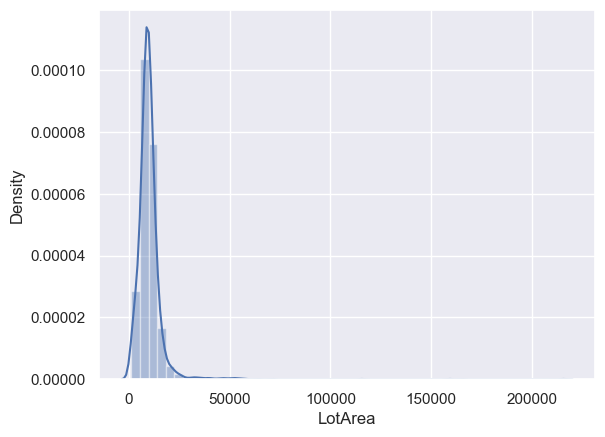

In [130]:
# lot Area column distribution:
sns.distplot(tmp_data['LotArea'])
plt.show()

In [131]:
tmp_data['LotArea'].describe()

count      2919.000000
mean      10168.114080
std        7886.996359
min        1300.000000
25%        7478.000000
50%        9453.000000
75%       11570.000000
max      215245.000000
Name: LotArea, dtype: float64

The smallest lot area is 1,300, with a maximum of up to 215,245, and an average of 10,168.



## g. Box Cox Transformation for feature columns with skewness >0.75 atau <-0.75

In [136]:
skewness = skewness[abs(skewness['Skew']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 4 skewed numerical features to Box Cox transform


In [138]:
# Box Cox transformation:
from scipy.special import boxcox1p

skewed_features = skewness.index
lam = 0.20
for feat in skewed_features:
    tmp_data[feat] = boxcox1p(tmp_data[feat], lam)

In [140]:
# features to be transformed:
skewed_features

Index(['LotArea', 'GrLivArea', 'KitchenQual', 'ExterQual'], dtype='object')

In [142]:
# results:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,RoofMatl,ExterQual,BedroomAbvGr,GrLivArea,MiscFeature,GarageArea,KitchenQual,SaleCondition
0,25.503637,2003,7,4,CompShg,1.228655,3,17.162564,NA,548.0,1.228655,Normal
1,26.291998,1976,6,7,CompShg,1.597540,3,15.856944,NA,460.0,1.597540,Normal
2,27.300424,2001,7,4,CompShg,1.228655,3,17.356042,NA,608.0,1.228655,Normal
3,26.259338,1915,7,4,CompShg,1.597540,3,17.180669,NA,642.0,1.228655,Abnorml
4,28.868815,2000,8,4,CompShg,1.228655,4,18.303173,NA,836.0,1.228655,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,CompShg,1.597540,3,15.262547,NA,0.0,1.597540,Normal
2915,17.619961,1970,4,4,CompShg,1.597540,3,15.262547,NA,286.0,1.597540,Abnorml
2916,31.239346,1960,5,6,CompShg,1.597540,4,15.729901,NA,576.0,1.597540,Abnorml
2917,26.821947,1992,5,4,CompShg,1.597540,3,14.788544,Shed,0.0,1.597540,Normal


In [144]:
# Check the skewness of all numerical features:
skewed_feats = tmp_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
OverallCond,0.570312
LotArea,0.496692
BedroomAbvGr,0.326324
GarageArea,0.239257
GrLivArea,0.230000
OverallQual,-0.326653
YearBuilt,-0.599806
KitchenQual,-2.156088
ExterQual,-2.778802


## h. One-Hot Encoding for non-ordinal categorical columns

In [147]:
tmp_data      

,LotArea,YearBuilt,OverallQual,OverallCond,RoofMatl,ExterQual,BedroomAbvGr,GrLivArea,MiscFeature,GarageArea,KitchenQual,SaleCondition
0,25.503637,2003,7,4,CompShg,1.228655,3,17.162564,NA,548.0,1.228655,Normal
1,26.291998,1976,6,7,CompShg,1.597540,3,15.856944,NA,460.0,1.597540,Normal
2,27.300424,2001,7,4,CompShg,1.228655,3,17.356042,NA,608.0,1.228655,Normal
3,26.259338,1915,7,4,CompShg,1.597540,3,17.180669,NA,642.0,1.228655,Abnorml
4,28.868815,2000,8,4,CompShg,1.228655,4,18.303173,NA,836.0,1.228655,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,CompShg,1.597540,3,15.262547,NA,0.0,1.597540,Normal
2915,17.619961,1970,4,4,CompShg,1.597540,3,15.262547,NA,286.0,1.597540,Abnorml
2916,31.239346,1960,5,6,CompShg,1.597540,4,15.729901,NA,576.0,1.597540,Abnorml
2917,26.821947,1992,5,4,CompShg,1.597540,3,14.788544,Shed,0.0,1.597540,Normal


In [149]:
tmp_data = pd.get_dummies(tmp_data, drop_first=True) # one hot encoding for other categorical data
print(tmp_data.shape)

(2919, 25)


In [151]:
# Check the results:
tmp_data

,LotArea,YearBuilt,OverallQual,OverallCond,ExterQual,BedroomAbvGr,GrLivArea,GarageArea,KitchenQual,RoofMatl_CompShg,...,RoofMatl_WdShngl,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,25.503637,2003,7,4,1.228655,3,17.162564,548.0,1.228655,True,...,False,True,False,False,False,False,False,False,True,False
1,26.291998,1976,6,7,1.597540,3,15.856944,460.0,1.597540,True,...,False,True,False,False,False,False,False,False,True,False
2,27.300424,2001,7,4,1.228655,3,17.356042,608.0,1.228655,True,...,False,True,False,False,False,False,False,False,True,False
3,26.259338,1915,7,4,1.597540,3,17.180669,642.0,1.228655,True,...,False,True,False,False,False,False,False,False,False,False
4,28.868815,2000,8,4,1.228655,4,18.303173,836.0,1.228655,True,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,1.597540,3,15.262547,0.0,1.597540,True,...,False,True,False,False,False,False,False,False,True,False
2915,17.619961,1970,4,4,1.597540,3,15.262547,286.0,1.597540,True,...,False,True,False,False,False,False,False,False,False,False
2916,31.239346,1960,5,6,1.597540,4,15.729901,576.0,1.597540,True,...,False,True,False,False,False,False,False,False,False,False
2917,26.821947,1992,5,4,1.597540,3,14.788544,0.0,1.597540,True,...,False,False,False,True,False,False,False,False,True,False


There is an additional columns from 12 to 25 (from RoofMatl, MiscFeature, and SaleCondition columns)

In [154]:
# save the encoding result columns for later use:
one_hot_columns = tmp_data.columns

## i. Scaling

In [157]:
# Check the value range:
tmp_data    

,LotArea,YearBuilt,OverallQual,OverallCond,ExterQual,BedroomAbvGr,GrLivArea,GarageArea,KitchenQual,RoofMatl_CompShg,...,RoofMatl_WdShngl,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,25.503637,2003,7,4,1.228655,3,17.162564,548.0,1.228655,True,...,False,True,False,False,False,False,False,False,True,False
1,26.291998,1976,6,7,1.597540,3,15.856944,460.0,1.597540,True,...,False,True,False,False,False,False,False,False,True,False
2,27.300424,2001,7,4,1.228655,3,17.356042,608.0,1.228655,True,...,False,True,False,False,False,False,False,False,True,False
3,26.259338,1915,7,4,1.597540,3,17.180669,642.0,1.228655,True,...,False,True,False,False,False,False,False,False,False,False
4,28.868815,2000,8,4,1.228655,4,18.303173,836.0,1.228655,True,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,17.719351,1970,4,6,1.597540,3,15.262547,0.0,1.597540,True,...,False,True,False,False,False,False,False,False,True,False
2915,17.619961,1970,4,4,1.597540,3,15.262547,286.0,1.597540,True,...,False,True,False,False,False,False,False,False,False,False
2916,31.239346,1960,5,6,1.597540,4,15.729901,576.0,1.597540,True,...,False,True,False,False,False,False,False,False,False,False
2917,26.821947,1992,5,4,1.597540,3,14.788544,0.0,1.597540,True,...,False,False,False,True,False,False,False,False,True,False


In [159]:
# Use a robust scaler to reduce the impact of outliers in each column (far range of values):
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(tmp_data)
tmp_data = scaler.transform(tmp_data)

In [161]:
tmp_data

array([[-0.25487439,  0.63157895,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03551351,  0.06315789,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40696091,  0.58947368,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.85783766, -0.27368421, -0.5       , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.2307166 ,  0.4       , -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.04198905,  0.42105263,  0.5       , ...,  0.        ,
         0.        ,  0.        ]])

# 4. Split Data Training dan Testing

In [164]:
X_train = tmp_data[:ntrain]
X_test = tmp_data[ntrain:]

X_train.shape, X_test.shape, y_train.shape

((1460, 25), (1459, 25), (1460,))

# 6. Modelling

In [167]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# Cross validation:
def test_model(model, X_train=X_train, y_train=y_train):    # create a function
    cv = KFold(n_splits = 4, shuffle=True, random_state = 45)   # 4x cross validation, shuffle
    r2 = make_scorer(r2_score)

    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)  # calculate R2
    score = [r2_val_score.mean()]
    return score


## a. Linear Regression

In [170]:
import sklearn.linear_model as linear_model
LR = linear_model.LinearRegression()
test_model(LR)

[0.8240757196006232]

## b. Lasso Regression

In [173]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

[0.8335074727025339]

## c. Random Forest

In [176]:
random_forest = linear_model.Ridge(alpha=1)
test_model(random_forest)

[0.8363080677683358]

Lasso and Random Forest Regression show better regression compared to others

## d. Support Vector Regression

In [180]:
from sklearn.svm import SVR
svr_reg = SVR(kernel= 'rbf')
test_model(svr_reg)

[0.8245841296419294]

## e. XGBoost

In [182]:
!pip install --upgrade xgboost

In [184]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
test_model(xgb_reg)

[0.815044432921986]

## f. Optimize the model: Lasso Regression vs Random Forest

**Lasso Regression**

In [187]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1, 10]}
grid_search = GridSearchCV(linear_model.Lasso(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Alpha: {grid_search.best_params_['alpha']}")


Best Alpha: 0.001


In [188]:
from sklearn.linear_model import Lasso

lasso_best = Lasso(alpha=0.001)
lasso_best.fit(X_train, y_train)


Lasso(alpha=0.001)

In [189]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lasso_best, X_train, y_train, cv=5, scoring='r2')

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation R² Scores: [0.87173941 0.85853769 0.83866367 0.86223495 0.78697472]
Mean R² Score: 0.8436
Standard Deviation: 0.0303


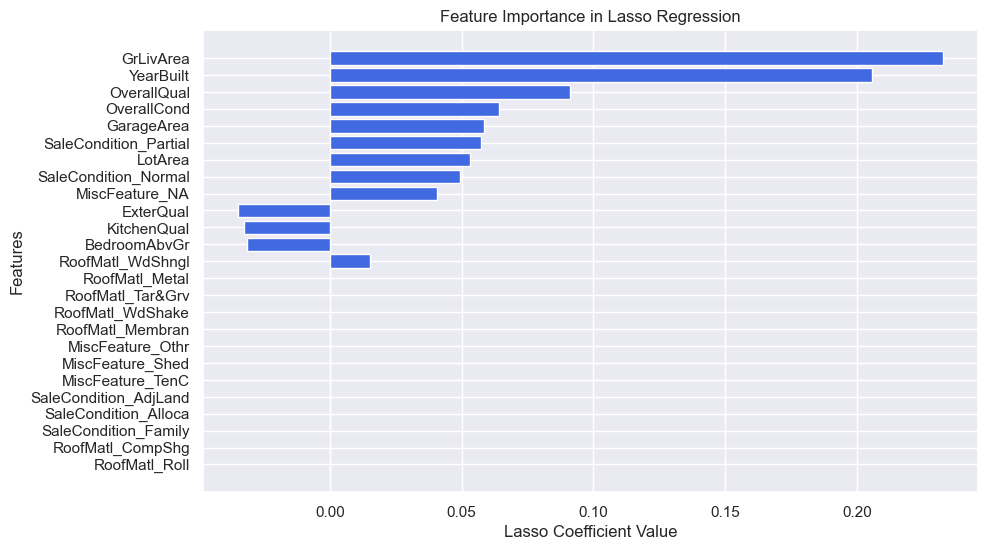

                  Feature  Importance
6               GrLivArea    0.232665
1               YearBuilt    0.205813
2             OverallQual    0.091143
3             OverallCond    0.064278
7              GarageArea    0.058531
24  SaleCondition_Partial    0.057317
0                 LotArea    0.053069
23   SaleCondition_Normal    0.049281
16         MiscFeature_NA    0.040732
4               ExterQual   -0.034696


In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Train Lasso model:
lasso = Lasso(alpha=0.001)  
lasso.fit(X_train, y_train)

# create feature coefficients:
lasso_coefs = lasso.coef_

# Create DataFrame for visualization:
# Replace X_train.columns with one_hot_columns 
lasso_importance_df = pd.DataFrame({'Feature': one_hot_columns, 'Importance': lasso_coefs})  
lasso_importance_df = lasso_importance_df.sort_values(by='Importance', ascending=False, key=abs)  # Sort by absolute value

# Visualization:
plt.figure(figsize=(10,6))
plt.barh(lasso_importance_df['Feature'], lasso_importance_df['Importance'], color='royalblue')
plt.xlabel('Lasso Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Lasso Regression')
plt.gca().invert_yaxis()
plt.show()

# Show the most influential features:
print(lasso_importance_df.head(10))  # Top 10 the important features

**Random Forest**

In [192]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)


{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [193]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Use the best parameters from GridSearchCV
best_rf = RandomForestRegressor(
    max_depth=30, 
    max_features='sqrt', 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=500, 
    random_state=42
)

# Perform cross-validation
scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

print("Mean Cross-Validation R²:", scores.mean())
print("Standard Deviation:", scores.std())


Mean Cross-Validation R²: 0.8500130283032352
Standard Deviation: 0.011010251796251471


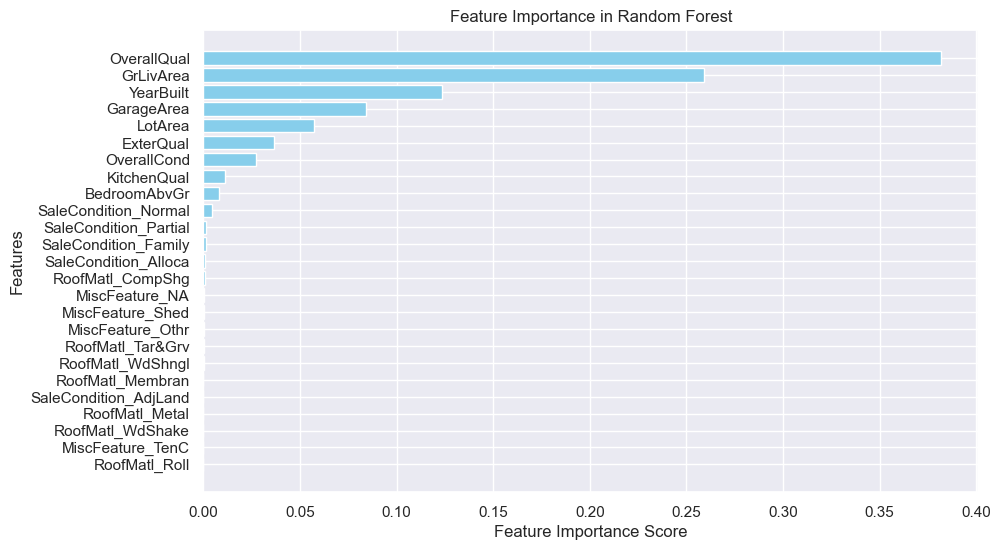

                 Feature  Importance
2            OverallQual    0.381875
6              GrLivArea    0.259145
1              YearBuilt    0.123283
7             GarageArea    0.084152
0                LotArea    0.057279
4              ExterQual    0.036430
3            OverallCond    0.027518
8            KitchenQual    0.011399
5           BedroomAbvGr    0.008284
23  SaleCondition_Normal    0.004296


In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Let X_train be the features and y_train be the target
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

# Get the important features:
importances = rf.feature_importances_

# **Get feature names from the training data**
# Assuming one_hot_columns contains the feature names from before the scaling step
feature_names = one_hot_columns  

# Create DataFrame for visualization:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show the results:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

print(feature_importance_df.head(10))  # Top 10 the important features

Based on the cross-validation results, both models perform well, but: 
- Random Forest has a slightly higher mean R2 score (0.8496 vs. 0.8436 for Lasso), indicating it might generalize slightly better.
- Additionally, the standard deviation for Random Forest is lower (0.0142 vs. 0.0303), suggesting it is more stable across different validation splits.

Thus, since after tuning Random Forest has higher and more stable R², it is the best choice to predict SalePrice.

# 7. Try to predict new data with the Lasso regression model (because the r2 score is the highest compared to other algorithms)

In [198]:
pd.DataFrame(tmp_data)    #created in dataframe form

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.254874,0.631579,0.5,0.0,-1.0,0.0,0.395595,0.265625,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.035514,0.063158,0.0,3.0,0.0,0.0,-0.305745,-0.078125,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.406961,0.589474,0.5,0.0,-1.0,0.0,0.499525,0.500000,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.023483,-1.221053,0.5,0.0,0.0,0.0,0.405320,0.632812,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4,0.984668,0.568421,1.0,0.0,-1.0,1.0,1.008295,1.390625,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.122167,-0.063158,-1.0,2.0,0.0,0.0,-0.625037,-1.875000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,-3.158777,-0.063158,-1.0,0.0,0.0,0.0,-0.625037,-0.757812,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2916,1.857838,-0.273684,-0.5,2.0,0.0,1.0,-0.373989,0.375000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
2917,0.230717,0.400000,-0.5,0.0,0.0,0.0,-0.879657,-1.875000,0.0,0.0,...,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
# random forest model:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=500, random_state=42)

# Training the model with training data:
model = random_forest.fit(X_train, y_train)

In [200]:
tmp_data[0]

array([-0.25487439,  0.63157895,  0.5       ,  0.        , -1.        ,
        0.        ,  0.39559454,  0.265625  , -1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [201]:
# Predict data to -0
model.predict(tmp_data[0].reshape(1,-1))

array([12.23591967])

In [202]:
# Predicted sale price:
np.expm1(12.25771747)

210599.33513183476

In [207]:
# compare the predicted sale price with the actual house price:
y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [208]:
# The actual sale price for first row houses in training data:
np.expm1(12.24769912)

208500.00075632462

In [209]:
# try to input new data to predict how much the house will cost
new_data = {'LotArea': [8000],
             'YearBuilt':[2010],
             'OverallQual':['8'],
             'OverallCond':['7'],
             'GrLivArea':[2000],
            'MiscFeature':['Shed'],
            'ExterQual' :['Gd'],
            'RoofMatl' : ['Compshg'],
            'SaleCondition' : ['Normal'],
             'GarageArea': [500],
             'KitchenQual': ['Gd'],}

In [211]:
tmp = pd.DataFrame(new_data)
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,ExterQual,RoofMatl,SaleCondition,GarageArea,KitchenQual
0,8000,2010,8,7,2000,Shed,Gd,Compshg,Normal,500,Gd


In [212]:
new_data_tf = new_data.copy()

In [213]:
# label encoding for new data
new_data_tf['OverallQual'] = encoders['OverallQual'].transform(tmp['OverallQual'])[0]
new_data_tf['OverallCond'] = encoders['OverallCond'].transform(tmp['OverallCond'])[0]
new_data_tf['ExterQual'] = encoders['ExterQual'].transform(tmp['ExterQual'])[0]
new_data_tf['KitchenQual'] = encoders['KitchenQual'].transform(tmp['KitchenQual'])[0]

In [214]:
# transformasi boxcox untuk kolom LotArea, GrLivArea, dan KitchenQual
new_data_tf['LotArea'] = boxcox1p(tmp['LotArea'], lam)[0]
new_data_tf['GrLivArea'] = boxcox1p(tmp['GrLivArea'], lam)[0]
new_data_tf['KitchenQual'] = boxcox1p(new_data_tf['KitchenQual'], lam)
new_data_tf['ExterQual'] = boxcox1p(new_data_tf['ExterQual'], lam)

In [215]:
tmp = pd.DataFrame(new_data_tf)

In [216]:
tmp = pd.get_dummies(tmp, columns = ['MiscFeature', 'RoofMatl', 'SaleCondition'])
tmp

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,ExterQual,GarageArea,KitchenQual,MiscFeature_Shed,RoofMatl_Compshg,SaleCondition_Normal
0,25.171636,2010,8,6,17.867539,1.228655,500,1.228655,True,True,True


In [217]:
# Adding missing columns to new data:
for kolom in one_hot_columns:
    if kolom not in tmp.columns:
        tmp[kolom] = 0

In [218]:
tmp = tmp.reindex(columns=one_hot_columns, fill_value=0)

In [219]:
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1 non-null      float64
 1   YearBuilt              1 non-null      int64  
 2   OverallQual            1 non-null      int32  
 3   OverallCond            1 non-null      int32  
 4   ExterQual              1 non-null      float64
 5   BedroomAbvGr           1 non-null      int64  
 6   GrLivArea              1 non-null      float64
 7   GarageArea             1 non-null      int64  
 8   KitchenQual            1 non-null      float64
 9   RoofMatl_CompShg       1 non-null      int64  
 10  RoofMatl_Membran       1 non-null      int64  
 11  RoofMatl_Metal         1 non-null      int64  
 12  RoofMatl_Roll          1 non-null      int64  
 13  RoofMatl_Tar&Grv       1 non-null      int64  
 14  RoofMatl_WdShake       1 non-null      int64  
 15  RoofMatl_W

In [220]:
# Scaling
tmp_scaled = scaler.transform(tmp.loc[0].values.reshape(1,-1))

In [221]:
# house price prediction for new data
y = np.expm1(model.predict(tmp_scaled))
print(y)

[264503.94660399]


In [222]:
new_data['SalePrice'] = y

In [223]:
# show the predicted new house:
pd.DataFrame(new_data)

,LotArea,YearBuilt,OverallQual,OverallCond,GrLivArea,MiscFeature,ExterQual,RoofMatl,SaleCondition,GarageArea,KitchenQual,SalePrice
0,8000,2010,8,7,2000,Shed,Gd,Compshg,Normal,500,Gd,264503.946604


Random Forest Regression model is performing well with a Mean R² of 0.8496, but there might still be room for improvement. Here are some strategies to enhance its performance:
1. Check Feature Importance & remove irrelevant features, but before removing the feature, try running the model with and without certain features, then compare its performance.
2. Experiment with ensemble learning (stacking/blending).
3. Look for external data that can provide more insights into house prices, for example, macroeconomic data (Inflation, interest rates, average salary), more detailed location data (crime rate, school quality, transportation).